In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_excel("Pistachio_28_Features_Dataset.xlsx")
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [3]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [13]:
df = pd.concat([df.iloc[:,:12],df["Class"]],axis=1)
# df=df[['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
#        'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
#        'Roundness', 'Compactness', 'Class']]
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,Siirt_Pistachio


In [15]:
def encoder(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

In [16]:
df["Class"] = encoder(df["Class"])
# for a, b in enumerate(df["Class"].unique()):
#         df.loc[df["Class"] == b, "Class"] = int(a)

In [18]:
df.corrwith(df["Class"]).sort_values(ascending=False)

Class           1.000000
Minor_Axis      0.668126
Compactness     0.624939
Area            0.589226
Convex_Area     0.584618
Eqdiasq         0.577300
Perimeter       0.145290
Major_Axis      0.136845
Solidity        0.125347
Roundness       0.105768
Extent          0.100200
Eccentricity   -0.546759
Aspect_Ratio   -0.581469
dtype: float64

In [19]:
df.corr()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
Area,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,0.589226
Perimeter,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,0.145290
Major_Axis,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,0.136845
Minor_Axis,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,0.668126
Eccentricity,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,-0.546759
Eqdiasq,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,0.577300
Solidity,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,0.125347
Convex_Area,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,0.584618
Extent,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,0.100200
Aspect_Ratio,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,-0.581469


<AxesSubplot:>

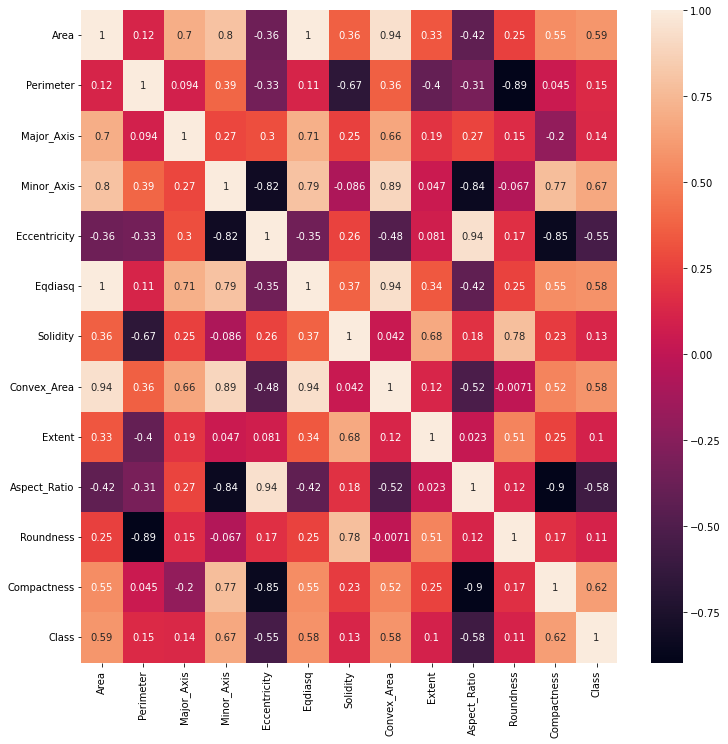

In [23]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True)

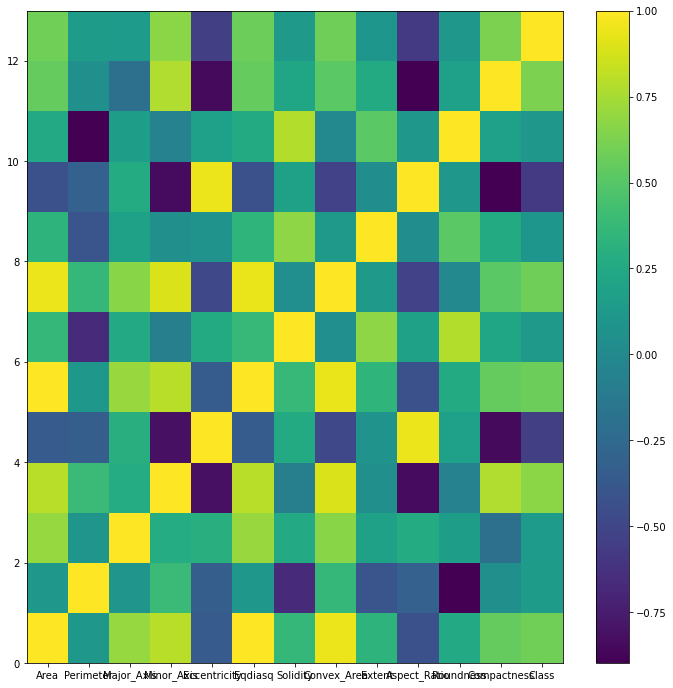

In [21]:
plt.figure(figsize = (12,12))
plt.pcolor(df.corr())
plt.xticks(np.arange(0.5, len(df.corr().columns), 1), df.corr().columns)
plt.xticks(np.arange(0.5, len(df.corr().index), 1), df.corr().index)
plt.colorbar()
plt.show()

In [32]:
df2 = df[['Minor_Axis', 'Solidity', 'Extent',
        'Roundness', 'Compactness', 'Class']]

<AxesSubplot:>

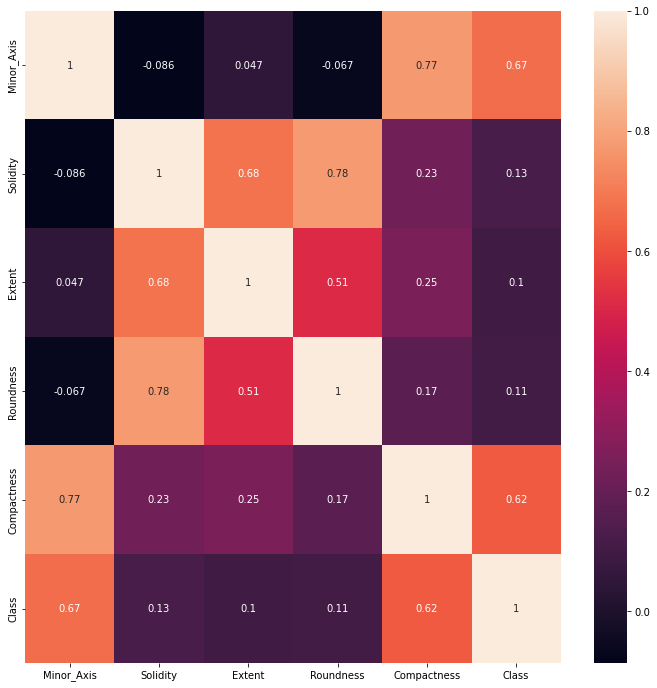

In [33]:
plt.figure(figsize = (12,12))
sns.heatmap(df2.corr(), annot=True)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df2[['Minor_Axis', 'Solidity', 'Extent', 'Roundness', 'Compactness']], df2["Class"], random_state=0)
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=90)
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier(n_estimators=500)
model5 = GradientBoostingClassifier(n_estimators=500)
model6 = xgb.XGBClassifier()
model7 = LGBMClassifier()

In [58]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

LGBMClassifier()

In [59]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)

In [60]:
# r2_score 확인 : 높을수록좋음
print(model1.score(X_test,y_test))
print(model2.score(X_test,y_test))
print(model3.score(X_test,y_test))
print(model4.score(X_test,y_test))
print(model5.score(X_test,y_test))
print(model6.score(X_test,y_test))
print(model7.score(X_test,y_test))

0.8522656734947238
0.8423339540657977
1.0
1.0
0.994413407821229
1.0
0.9987585350713842


In [61]:
predict_avg = np.round((predict1 + predict2 + predict3 + predict4 + predict5 + predict6 + predict7)/7)

In [65]:
score = 0
for a, i in enumerate(predict_avg):
    if y_test.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_test)

0.00186219739292365

In [77]:
model_score = [model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test),model4.score(X_test,y_test),model5.score(X_test,y_test),model6.score(X_test,y_test),model7.score(X_test,y_test)]
index_list = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','LGBMRegressor']
df = pd.DataFrame(model_score, index=index_list, columns=["class"])
df

,class
LinearRegression,0.886406
KNeighborsRegressor,0.845438
DecisionTreeRegressor,0.817505
RandomForestRegressor,0.877095
GradientBoostingRegressor,0.864060
XGBRegressor,0.869646
LGBMRegressor,0.867784


<BarContainer object of 7 artists>

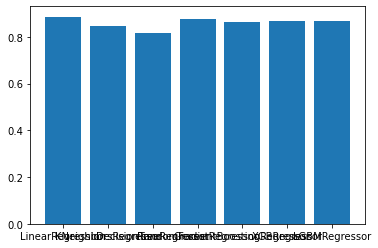

In [78]:
plt.bar(index_list, model_score)